# Mengimport Library



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math, os, sys, random
import itertools
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
from scipy import ndimage

from PIL import Image, UnidentifiedImageError
from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize

import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd

# EDA

In [2]:
!dir "../../Proyek Akhir/Dataset/Test"
!dir "../../Proyek Akhir/Dataset/Train"
!dir "../../Proyek Akhir/Dataset/Validation"

 Volume in drive D is Data
 Volume Serial Number is 6E7E-41A9

 Directory of D:\Semester 6\Proyek Akhir\Dataset\Test

25/07/2025  06:59    <DIR>          .
25/07/2025  06:58    <DIR>          ..
25/07/2025  06:58    <DIR>          Anorganik
25/07/2025  06:59    <DIR>          Organik
               0 File(s)              0 bytes
               4 Dir(s)  389.134.254.080 bytes free
 Volume in drive D is Data
 Volume Serial Number is 6E7E-41A9

 Directory of D:\Semester 6\Proyek Akhir\Dataset\Train

25/07/2025  06:58    <DIR>          .
25/07/2025  06:58    <DIR>          ..
25/07/2025  06:58    <DIR>          Anorganik
25/07/2025  06:59    <DIR>          Organik
               0 File(s)              0 bytes
               4 Dir(s)  389.134.254.080 bytes free
 Volume in drive D is Data
 Volume Serial Number is 6E7E-41A9

 Directory of D:\Semester 6\Proyek Akhir\Dataset\Validation

25/07/2025  06:59    <DIR>          .
25/07/2025  06:58    <DIR>          ..
25/07/2025  06:58    <DIR>      

In [3]:
anorganik_dir = "../../Proyek Akhir/Dataset/Train/Anorganik"
organik_dir = "../../Proyek Akhir/Dataset/Train/Organik"

Jumlah data training:
  Anorganik: 8709
  Organik  : 8892
Jumlah data testing:
  Anorganik: 1089
  Organik  : 1112
Jumlah data validation:
  Anorganik: 1089
  Organik  : 1111

Total data training: 17601
Total data testing : 2201
Total data testing    : 2201


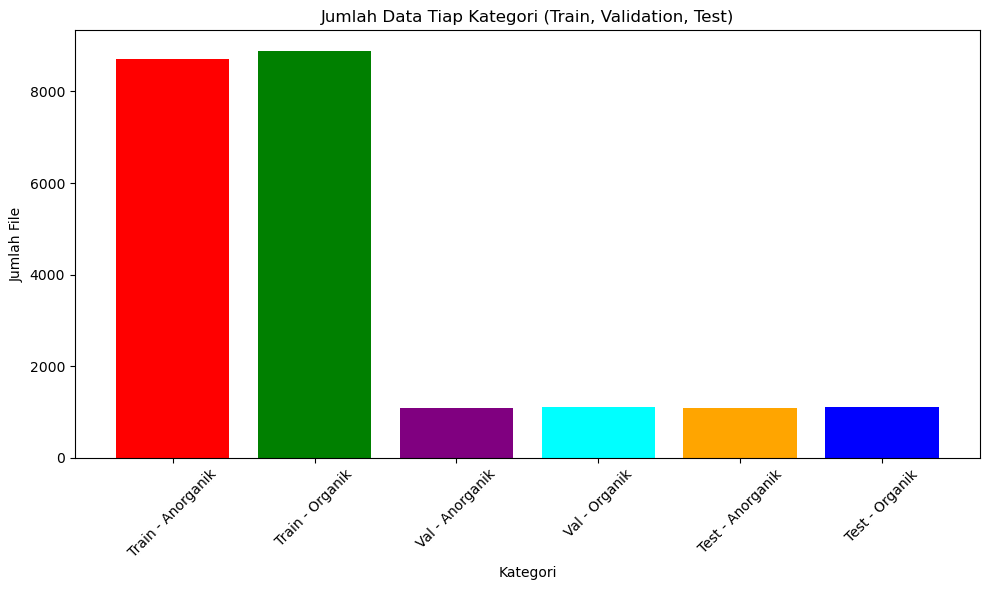

In [4]:
import os
import matplotlib.pyplot as plt

# Path direktori
train_anorganik_dir = "../../Proyek Akhir/Dataset/Train/Anorganik"
train_organik_dir = "../../Proyek Akhir/Dataset/Train/Organik"
test_anorganik_dir = "../../Proyek Akhir/Dataset/Test/Anorganik"
test_organik_dir = "../../Proyek Akhir/Dataset/Test/Organik"
val_anorganik_dir = "../../Proyek Akhir/Dataset/Validation/Anorganik"
val_organik_dir = "../../Proyek Akhir/Dataset/Validation/Organik"

# Fungsi untuk menghitung jumlah file dalam direktori
def count_files_in_dir(directory):
    return len([
        file for file in os.listdir(directory)
        if os.path.isfile(os.path.join(directory, file))
    ])

# Hitung jumlah data
train_anorganik_count = count_files_in_dir(train_anorganik_dir)
train_organik_count = count_files_in_dir(train_organik_dir)
test_anorganik_count = count_files_in_dir(test_anorganik_dir)
test_organik_count = count_files_in_dir(test_organik_dir)
val_anorganik_count = count_files_in_dir(val_anorganik_dir)
val_organik_count = count_files_in_dir(val_organik_dir)

# Cetak hasil
print("Jumlah data training:")
print(f"  Anorganik: {train_anorganik_count}")
print(f"  Organik  : {train_organik_count}")
print("Jumlah data testing:")
print(f"  Anorganik: {test_anorganik_count}")
print(f"  Organik  : {test_organik_count}")
print("Jumlah data validation:")
print(f"  Anorganik: {val_anorganik_count}")
print(f"  Organik  : {val_organik_count}")

total_train = train_anorganik_count + train_organik_count
total_test = test_anorganik_count + test_organik_count
total_val = val_anorganik_count + val_organik_count

print(f"\nTotal data training: {total_train}")
print(f"Total data testing : {total_test}")
print(f"Total data testing    : {total_test}")

# Bar Chart dengan validasi
labels = [
    'Train - Anorganik', 'Train - Organik',
    'Val - Anorganik', 'Val - Organik',
    'Test - Anorganik', 'Test - Organik'
]
counts = [
    train_anorganik_count, train_organik_count,
    val_anorganik_count, val_organik_count,
    test_anorganik_count, test_organik_count
]
colors = ['red', 'green', 'purple', 'cyan', 'orange', 'blue']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=colors)
plt.title('Jumlah Data Tiap Kategori (Train, Validation, Test)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah File')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

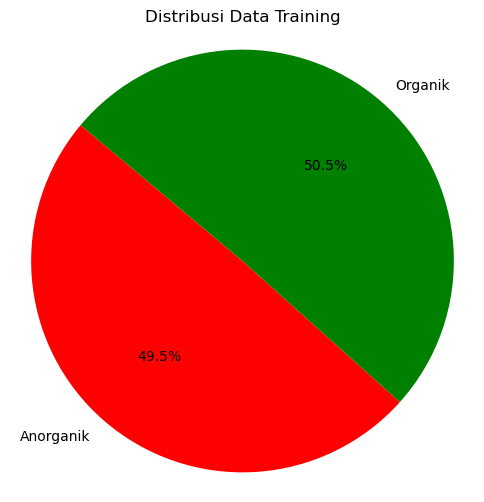

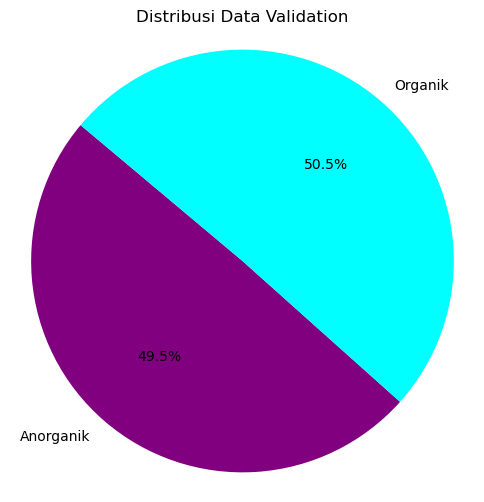

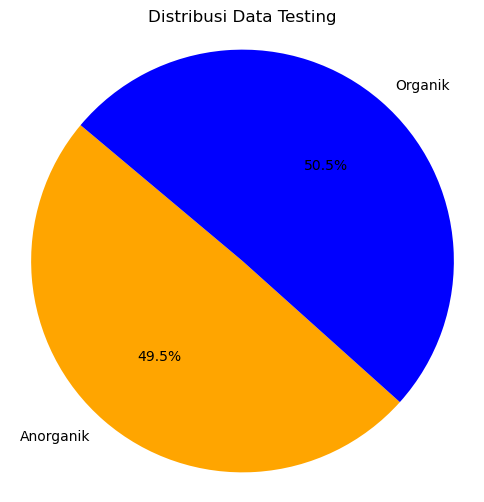

In [25]:
# Pie Chart - Train
plt.figure(figsize=(6, 6))
plt.pie(
    [train_anorganik_count, train_organik_count],
    labels=['Anorganik', 'Organik'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=140
)
plt.title('Distribusi Data Training')
plt.axis('equal')
plt.show()

# Pie Chart - Validation
plt.figure(figsize=(6, 6))
plt.pie(
    [val_anorganik_count, val_organik_count],
    labels=['Anorganik', 'Organik'],
    autopct='%1.1f%%',
    colors=['purple', 'cyan'],
    startangle=140
)
plt.title('Distribusi Data Validation')
plt.axis('equal')
plt.show()

# Pie Chart - Test
plt.figure(figsize=(6, 6))
plt.pie(
    [test_anorganik_count, test_organik_count],
    labels=['Anorganik', 'Organik'],
    autopct='%1.1f%%',
    colors=['orange', 'blue'],
    startangle=140
)
plt.title('Distribusi Data Testing')
plt.axis('equal')
plt.show()

Rata-rata Ukuran Gambar Anorganik: 325.35 x 280.55
Rata-rata Ukuran Gambar Organik  : 259.52 x 197.31


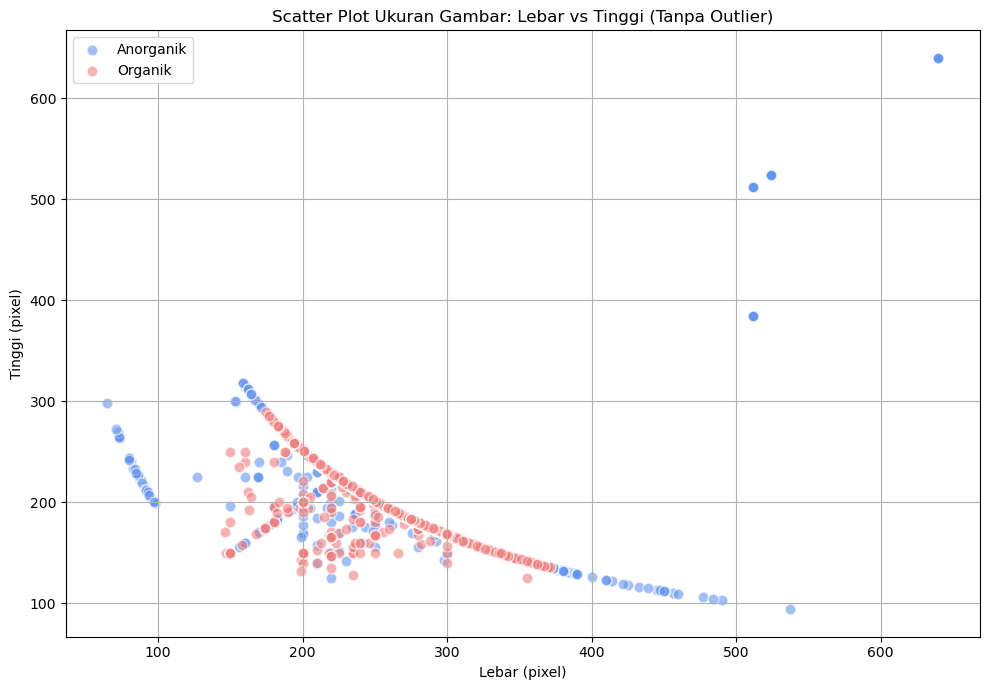

In [26]:
import os
from PIL import Image, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(widths, heights):
    widths, heights = np.array(widths), np.array(heights)
    
    # IQR untuk lebar
    q1_w, q3_w = np.percentile(widths, [25, 75])
    iqr_w = q3_w - q1_w
    lower_bound_w = q1_w - 1.5 * iqr_w
    upper_bound_w = q3_w + 1.5 * iqr_w

    # IQR untuk tinggi
    q1_h, q3_h = np.percentile(heights, [25, 75])
    iqr_h = q3_h - q1_h
    lower_bound_h = q1_h - 1.5 * iqr_h
    upper_bound_h = q3_h + 1.5 * iqr_h

    # Filter data
    mask = (
        (widths >= lower_bound_w) & (widths <= upper_bound_w) &
        (heights >= lower_bound_h) & (heights <= upper_bound_h)
    )
    return widths[mask].tolist(), heights[mask].tolist()

# Fungsi untuk mengambil ukuran (lebar, tinggi)
def get_image_sizes(image_dir):
    widths, heights = [], []
    for file in os.listdir(image_dir):
        file_path = os.path.join(image_dir, file)
        if not file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
            continue
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except (UnidentifiedImageError, OSError):
            print(f"File gagal dibuka: {file_path}")
            continue
    return widths, heights

# Ambil ukuran
widths_anorganik, heights_anorganik = get_image_sizes(anorganik_dir)
widths_organik, heights_organik = get_image_sizes(organik_dir)

# Hapus outlier
widths_anorganik, heights_anorganik = remove_outliers_iqr(widths_anorganik, heights_anorganik)
widths_organik, heights_organik = remove_outliers_iqr(widths_organik, heights_organik)

# Hitung rata-rata
avg_width_anorganik = np.mean(widths_anorganik)
avg_height_anorganik = np.mean(heights_anorganik)
avg_width_organik = np.mean(widths_organik)
avg_height_organik = np.mean(heights_organik)

# Tampilkan hasil rata-rata ukuran
print(f"Rata-rata Ukuran Gambar Anorganik: {avg_width_anorganik:.2f} x {avg_height_anorganik:.2f}")
print(f"Rata-rata Ukuran Gambar Organik  : {avg_width_organik:.2f} x {avg_height_organik:.2f}")

# Scatter plot lebar vs tinggi untuk masing-masing kelas
plt.figure(figsize=(10, 7))
plt.scatter(widths_anorganik, heights_anorganik, alpha=0.6, label='Anorganik', color='cornflowerblue', edgecolors='w', s=60)
plt.scatter(widths_organik, heights_organik, alpha=0.6, label='Organik', color='lightcoral', edgecolors='w', s=60)

plt.title('Scatter Plot Ukuran Gambar: Lebar vs Tinggi (Tanpa Outlier)')
plt.xlabel('Lebar (pixel)')
plt.ylabel('Tinggi (pixel)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

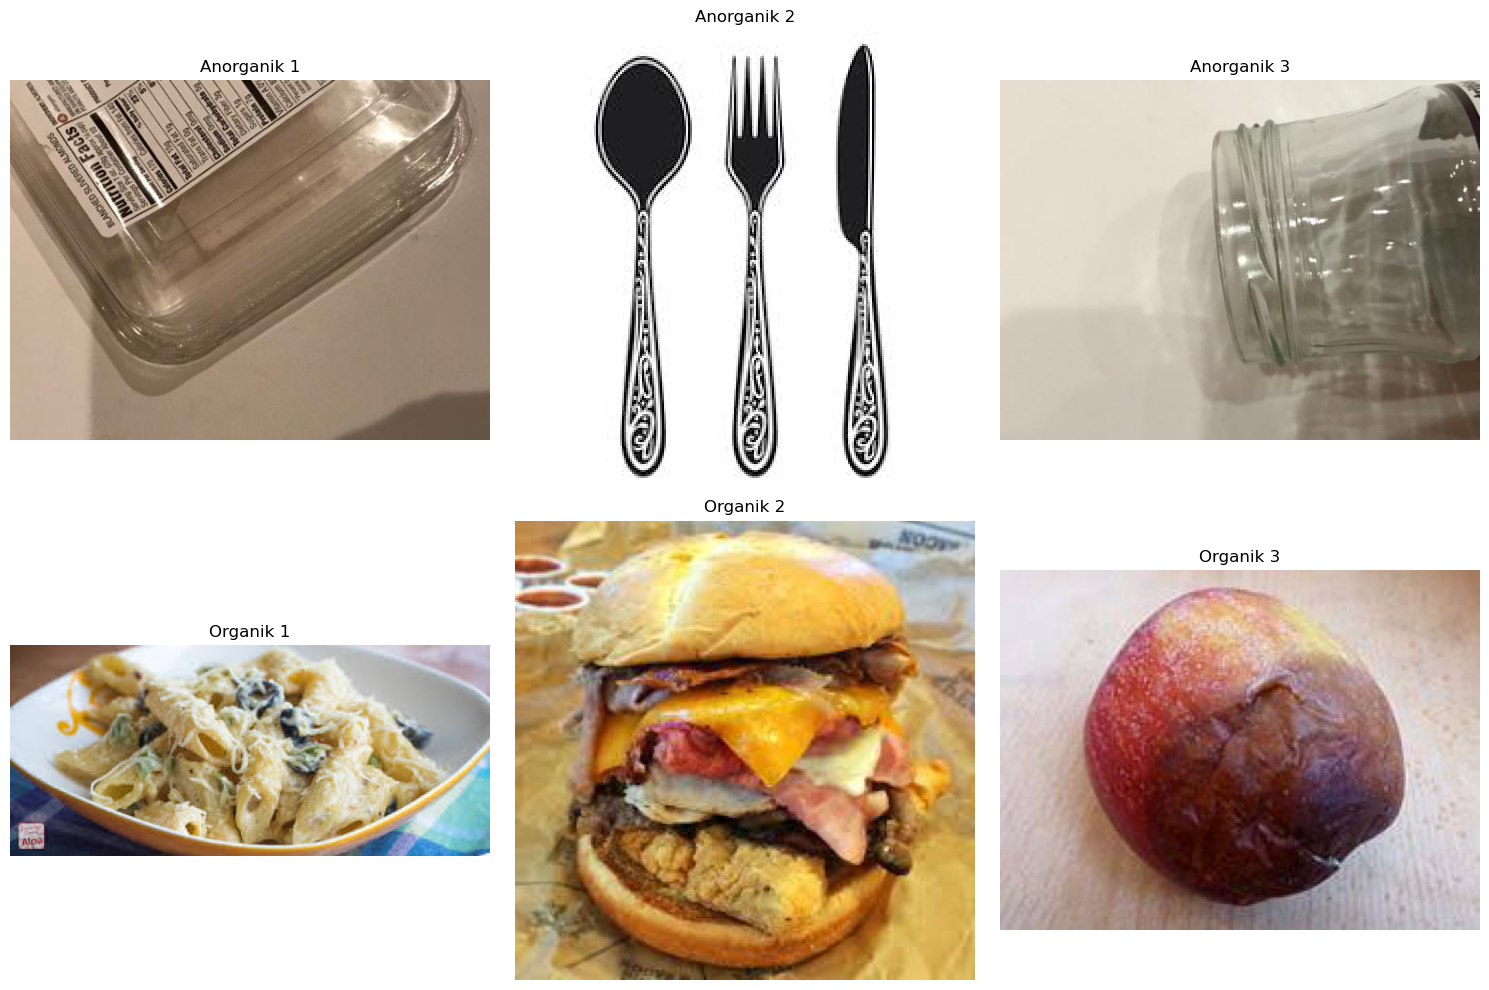

In [6]:
image_anorganik_paths = random.sample(os.listdir(anorganik_dir), 3)
image_organik_paths = random.sample(os.listdir(organik_dir), 3)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, filename in enumerate(image_anorganik_paths):
    image_anorganik = imread(os.path.join(anorganik_dir, filename))
    axes[0, i].imshow(image_anorganik)
    axes[0, i].set_title(f'Anorganik {i+1}')
    axes[0, i].axis('off')

for i, filename in enumerate(image_organik_paths):
    image_organik = imread(os.path.join(organik_dir, filename))
    axes[1, i].imshow(image_organik)
    axes[1, i].set_title(f'Organik {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Preprocessing

Found 17601 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Jumlah gambar per kelas di data pelatihan:
Anorganik: 8709
Organik: 8892

Jumlah gambar per kelas di data pengujian:
Anorganik: 1088
Organik: 1112


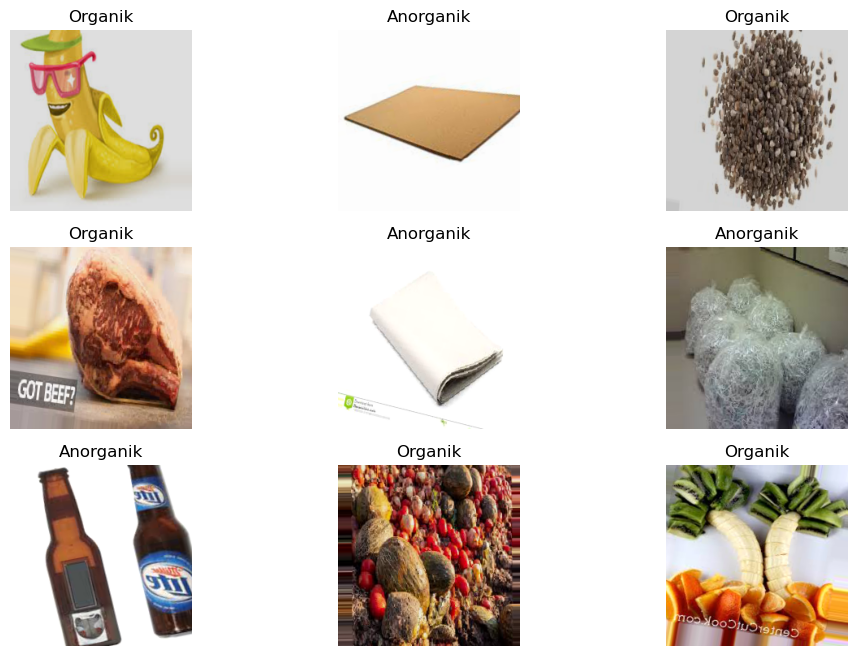

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BASE_DIR = "../../Proyek Akhir/Dataset/"
TRAIN_DIR = os.path.join(BASE_DIR, "Train")
TEST_DIR = os.path.join(BASE_DIR, "Test")
VAL_DIR = os.path.join(BASE_DIR, "Validation")

# Inisialisasi untuk augmentasi data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Inisialisasi untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)

# Menyiapkan generator data pelatihan
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Menyiapkan generator data pengujian
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Menyiapkan generator data validasi
val_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Menampilkan contoh gambar dari generator data pelatihan
def plot_images(generator):
    x_batch, y_batch = next(generator)
    class_indices = generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        class_index = np.argmax(y_batch[i])
        class_name = class_names[class_index]
        plt.title(class_name)
        plt.axis("off")
    plt.show()

# Menghitung jumlah gambar dalam setiap kelas dengan cepat
def count_images_fast(generator):
    class_indices = generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}
    counts = np.bincount(generator.classes)
    class_counts = {class_names[i]: count for i, count in enumerate(counts)}
    return class_counts

train_counts = count_images_fast(train_generator)
test_counts = count_images_fast(test_generator)

print("Jumlah gambar per kelas di data pelatihan:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count}")

print("\nJumlah gambar per kelas di data pengujian:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count}")

# Plot contoh gambar dari generator data pelatihan
plot_images(train_generator)

In [8]:
#menyimpan label
print (train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'Anorganik': 0, 'Organik': 1}


# Membuat Model

In [9]:
!pip install tensorflow

In [9]:
IMG_SHAPE = (224, 224, 3)

# Membuat model dasar (base model) dari pre-trained model MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Membekukan lapisan base model
base_model.trainable = False

# Menampilkan summary base model
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,607,618 (9.95 MB)

 Trainable params: 347,074 (1.32 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

# Training Model

In [11]:
# Training tanpa callback, dengan 50 epoch
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 531s 954ms/step - accuracy: 0.7999 - loss: 0.4708 - val_accuracy: 0.9632 - val_loss: 0.0952
Epoch 2/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 394s 714ms/step - accuracy: 0.9368 - loss: 0.1701 - val_accuracy: 0.9691 - val_loss: 0.0795
Epoch 3/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 394s 714ms/step - accuracy: 0.9543 - loss: 0.1280 - val_accuracy: 0.9718 - val_loss: 0.0710
Epoch 4/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 326s 592ms/step - accuracy: 0.9595 - loss: 0.1161 - val_accuracy: 0.9745 - val_loss: 0.0671
Epoch 5/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 327s 593ms/step - accuracy: 0.9622 - loss: 0.1050 - val_accuracy: 0.9773 - val_loss: 0.0623
Epoch 6/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 325s 590ms/step - accuracy: 0.9644 - loss: 0.0935 - val_accuracy: 0.9791 - val_loss: 0.0609
Epoch 7/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 328s 595ms/step - accuracy: 0.9698 - loss: 0.0828 - val_accuracy: 0.9800 - val_loss: 0.0542
Epoch 8/50
551/551 ━━━━━━━━━━━━━━━━━━━━ 328s 594ms/step - accuracy: 0.9697 -

# Evaluation

In [12]:
# Evaluating the loss and accuracy of the model
loss, acc = model.evaluate(test_generator)

69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 486ms/step - accuracy: 0.9925 - loss: 0.0290


In [13]:
# Mendapatkan data loss dan akurasi dari dataset pengujian
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {acc}')

Test Loss: 0.028827669098973274
Test Accuracy: 0.9913636445999146


In [14]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9912 - loss: 0.0334
Validation Loss: 0.03494573011994362
Validation Accuracy: 0.9886363744735718


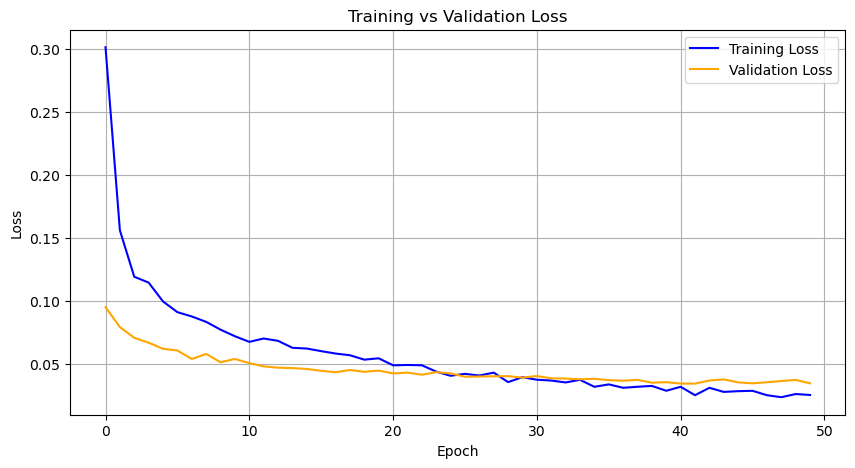

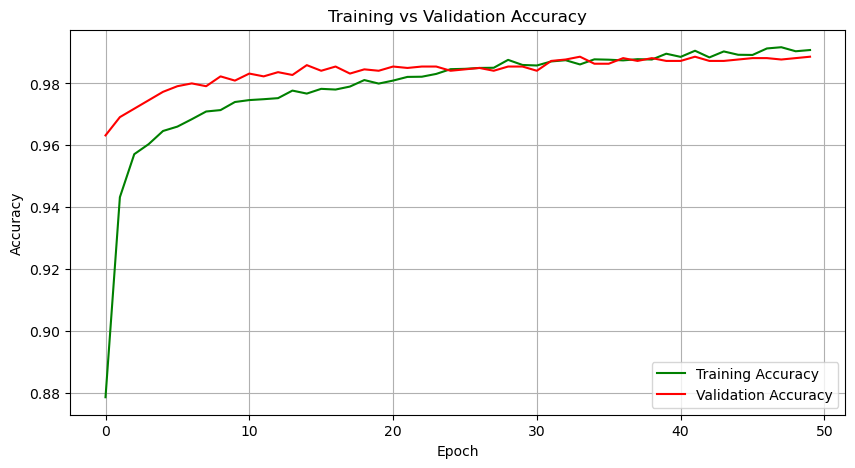

In [15]:
import matplotlib.pyplot as plt

# Mendapatkan data dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 347ms/step


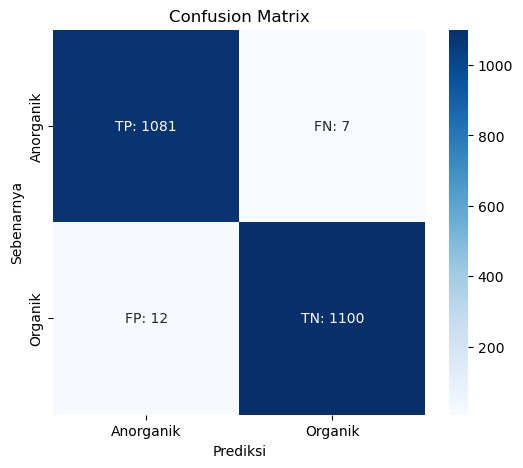

=== Classification Metrics ===
Accuracy : 0.9913636363636363
Precision: 0.993676603432701
Recall   : 0.9892086330935251
F1-Score : 0.9914375844975214

=== Classification Report ===
              precision    recall  f1-score   support

   Anorganik     0.9890    0.9936    0.9913      1088
     Organik     0.9937    0.9892    0.9914      1112

    accuracy                         0.9914      2200
   macro avg     0.9913    0.9914    0.9914      2200
weighted avg     0.9914    0.9914    0.9914      2200



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Prediksi menggunakan model
y_pred = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Label sebenarnya
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Definisi elemen Confusion Matrix
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

# Tampilkan Confusion Matrix
labels = np.array([[f"TP: {TP}", f"FN: {FN}"], 
                   [f"FP: {FP}", f"TN: {TN}"]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=["Anorganik", "Organik"],
            yticklabels=["Anorganik", "Organik"])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

# Hitung metrik
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

# Tampilkan hasil
print("=== Classification Metrics ===")
print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1-Score : {f1}")

# (Opsional) Classification Report Lengkap
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred_classes, target_names=["Anorganik", "Organik"], digits=4))

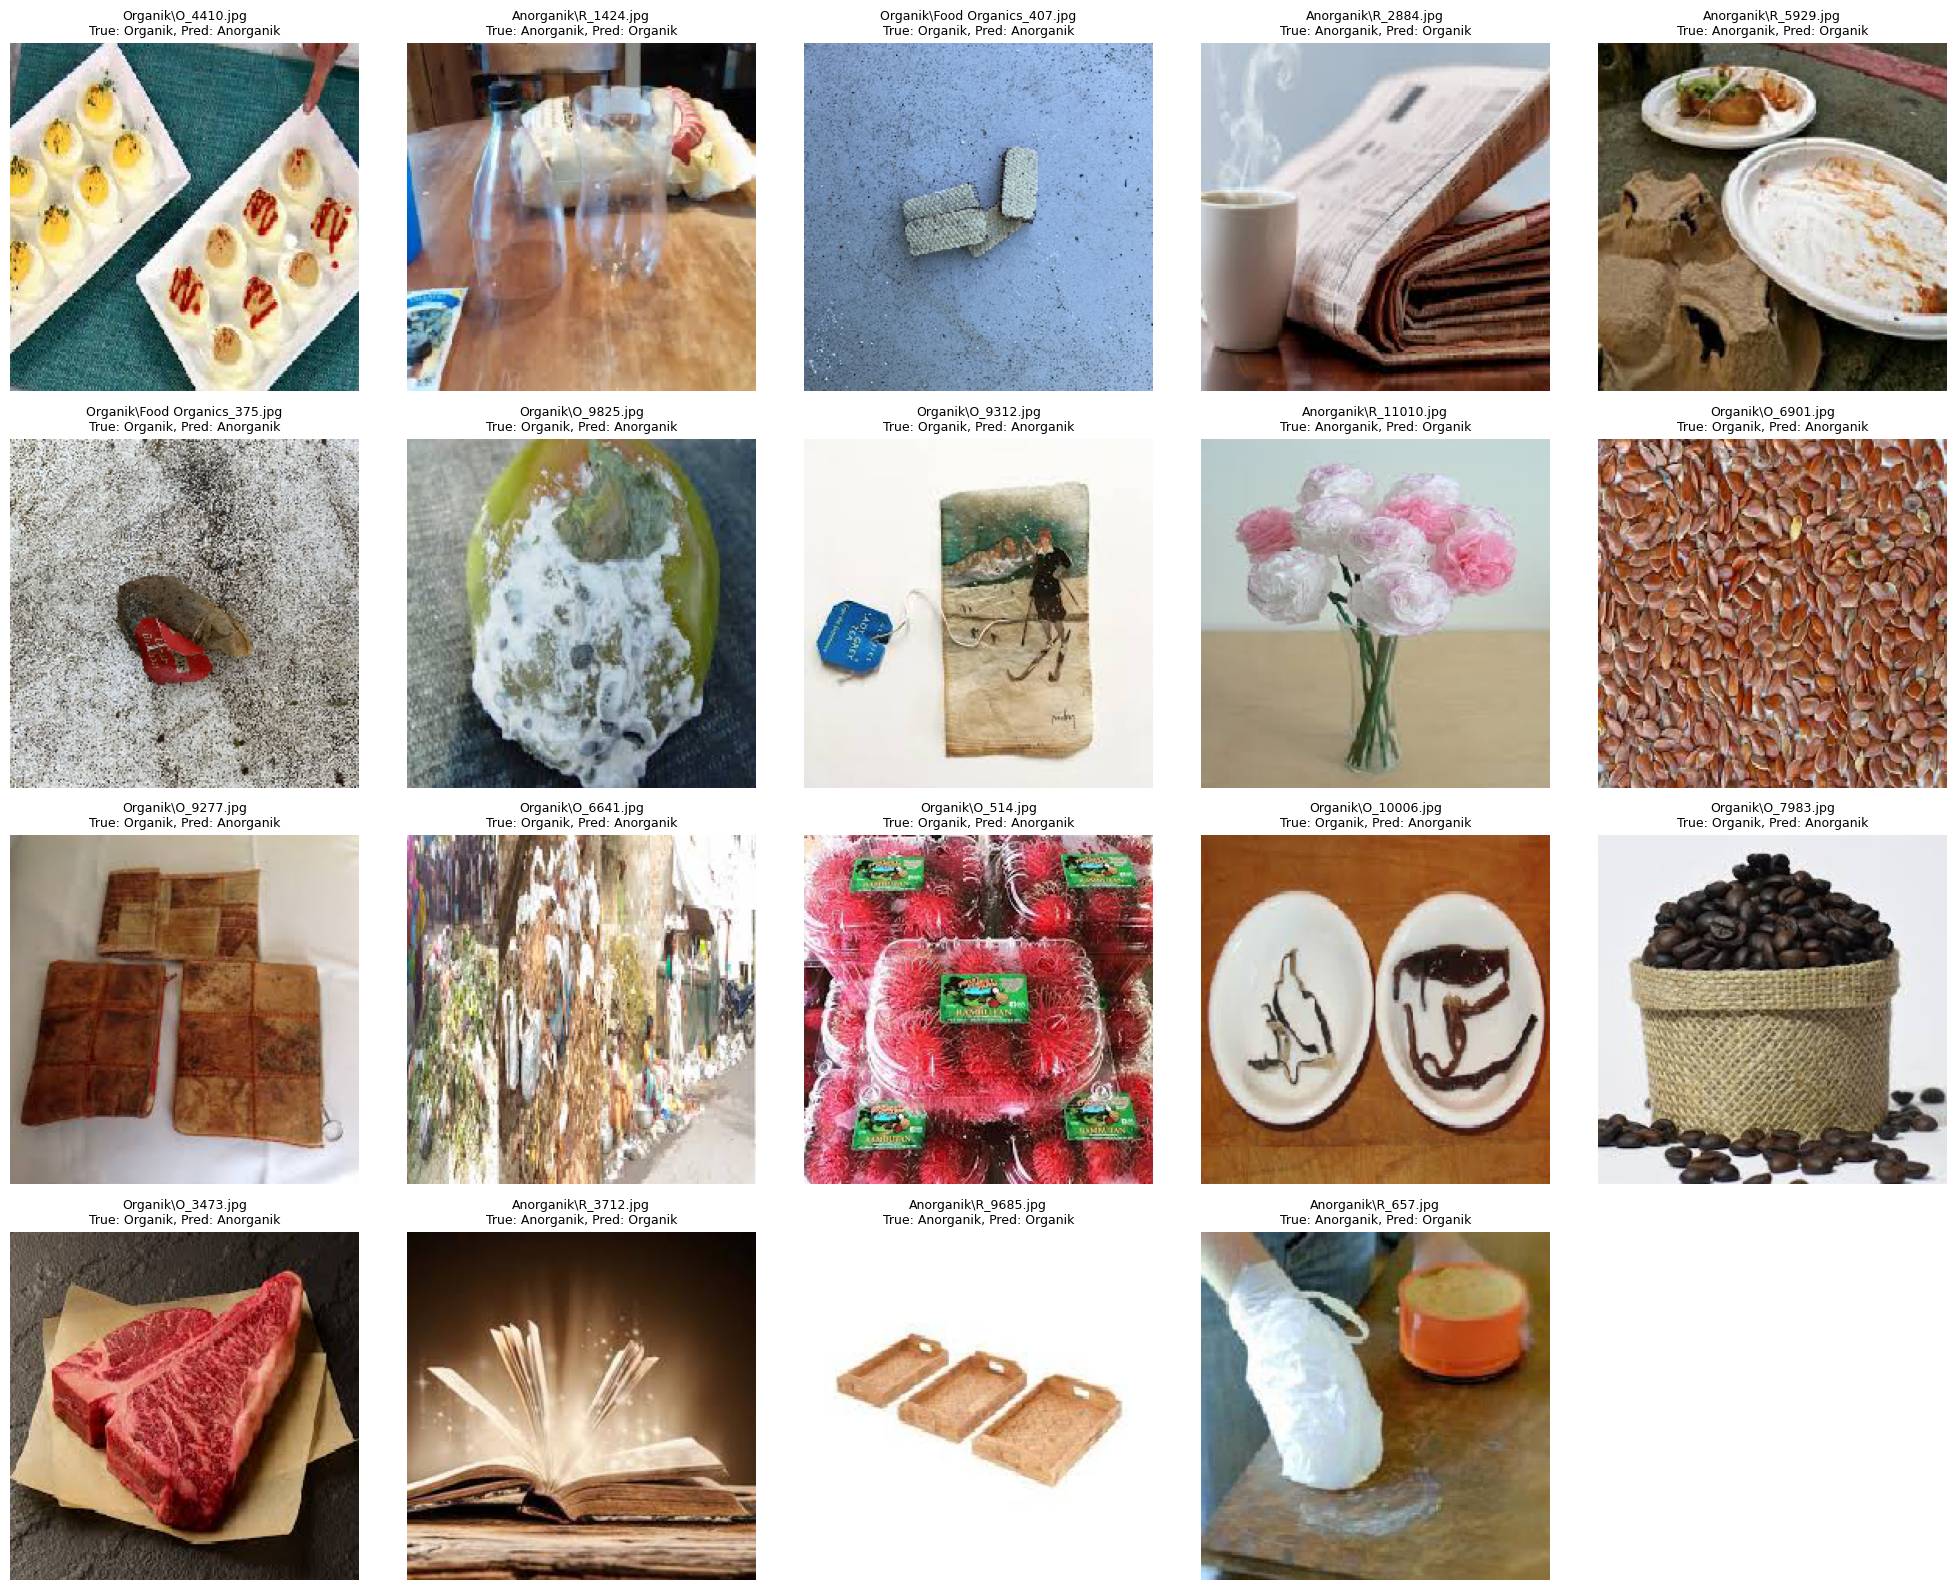

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Reset generator dan siapkan data
test_generator.reset()
x_test, y_true = [], []

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    x_test.extend(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))

x_test = np.array(x_test)
y_true = np.array(y_true)

# Prediksi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Indeks salah prediksi
misclassified_idx = np.where(y_pred_classes != y_true)[0]
np.random.shuffle(misclassified_idx)

# Nama kelas dan file
class_names = list(test_generator.class_indices.keys())
filenames = test_generator.filenames

# Konfigurasi grid
num_images = len(misclassified_idx)
cols = 5
rows = math.ceil(num_images / cols)

# Plot semua gambar salah prediksi
plt.figure(figsize=(cols * 4, rows * 4))
for i, idx in enumerate(misclassified_idx):
    plt.subplot(rows, cols, i + 1)
    plt.imshow((x_test[idx] * 255).astype("uint8"))
    filename = filenames[idx]
    plt.title(f"{filename}\nTrue: {class_names[y_true[idx]]}, Pred: {class_names[y_pred_classes[idx]]}", fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Simpan Model

In [18]:
model.save('model_mobilenetv2.h5')

In [19]:
# Convert the Keras model directly to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model_smartwaste.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ievan\AppData\Local\Temp\tmpu5cdelpk\assets


INFO:tensorflow:Assets written to: C:\Users\ievan\AppData\Local\Temp\tmpu5cdelpk\assets


Saved artifact at 'C:\Users\ievan\AppData\Local\Temp\tmpu5cdelpk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1489450515344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465313808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465315728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465315344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465314192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465315920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465314960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465312848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465316112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489465314000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1